In [1]:
# We use mean and median when the data is Numerical
# and we use Mode when the data is categorical type

### Missing Value imputation by Mean and Median

#### 1. Cleaning Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv(r"C:\\Users\\KRISHNA\\Downloads\\Compressed\\house-prices-advanced-regression-techniques\\train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [49]:
df.shape

(1460, 81)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [52]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [53]:
missing_value_clm_gre_20 = missing_value_per[missing_value_per  >20].keys()
missing_value_clm_gre_20

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [54]:
df2_drop_clm = df.drop(columns = missing_value_clm_gre_20)
df2_drop_clm.shape

(1460, 76)

In [55]:
df3_num = df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20          NaN    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20          NaN    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20          NaN     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20          NaN     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60          NaN    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [112]:
df3_num.shape  #So total 38 columns are available with Numerical Values

(1460, 38)

<AxesSubplot:>

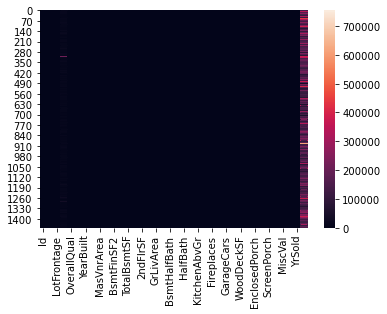

In [119]:
sns.heatmap(df3_num)

In [121]:
df3_num[df3_num.isnull().any(axis=1)]  #DF.any(axis=0/1)  >> Return whether any element is True over requested axis.

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
7        8          60          NaN    10382            7            6   
12      13          20          NaN    12968            5            6   
14      15          20          NaN    10920            6            5   
16      17          20          NaN    11241            6            7   
24      25          20          NaN     8246            5            8   
31      32          20          NaN     8544            5            6   
39      40          90         65.0     6040            4            5   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
48      49         190         33.0     4456            4            5   
50      51          60          NaN    13869            6            6   
64      65          60          NaN     9375            7            5   
66      67          20          NaN    19900            7            5   
76      77          20          NaN     8475            4            7   
78      79          90         72.0    10778            4            5   
84      85          80          NaN     8530            7            5   
88      89          50        105.0     8470            3            2   
89      90          20         60.0     8070            4            5   
95      96          60          NaN     9765            6            8   
99     100          20         77.0     9320            4            5   
100    101          20          NaN    10603            6            7   
104    105          50          NaN     7758            7            4   
108    109          50         85.0     8500            5            7   
111    112          80          NaN     7750            7            5   
113    114          20          NaN    21000            6            5   
116    117          20          NaN    11616            5            5   
120    121          80          NaN    21453            6            5   
125    126         190         60.0     6780            6            8   
126    127         120          NaN     4928            6            5   
127    128          45         55.0     4388            5            7   
131    132          60          NaN    12224            6            5   
133    134          20          NaN     6853            8            5   
136    137          20          NaN    10355            5            5   
140    141          20         70.0    10500            4            5   
147    148          60          NaN     9505            7            5   
148    149          20         63.0     7500            7            5   
149    150          50          NaN     6240            5            4   
152    153          60          NaN    14803            6            5   
153    154          20          NaN    13500            6            7   
155    156          50         60.0     9600            6            5   
160    161          20          NaN    11120            6            6   
163    164          45         55.0     5500            4            6   
165    166         190         62.0    10106            5            7   
166    167          20          NaN    10708            5            5   
169    170          20          NaN    16669            8            6   
170    171          50          NaN    12358            5            6   
177    178          50          NaN    13650            5            5   
180    181         160          NaN     2117            6            5   
186    187          80          NaN     9947            7            5   
191    192          60          NaN     7472            7            9   
198    199          75         92.0     5520            6            6   
203    204         120          NaN     4438            6            5   
207    208          20          NaN    12493            4            5   
208    209  

In [122]:
df3_num[df3_num.isnull().any(axis=1)].shape

(339, 38)

In [123]:
null_clm = df3_num.isnull().sum()
null_clm

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [124]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# The above and bolow, both can be used. Above one is preferred. 

In [64]:
null_clm_gre_0 = null_clm[null_clm > 0].keys()   
null_clm_gre_0

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Now to start the Mean and Median Imputing Process

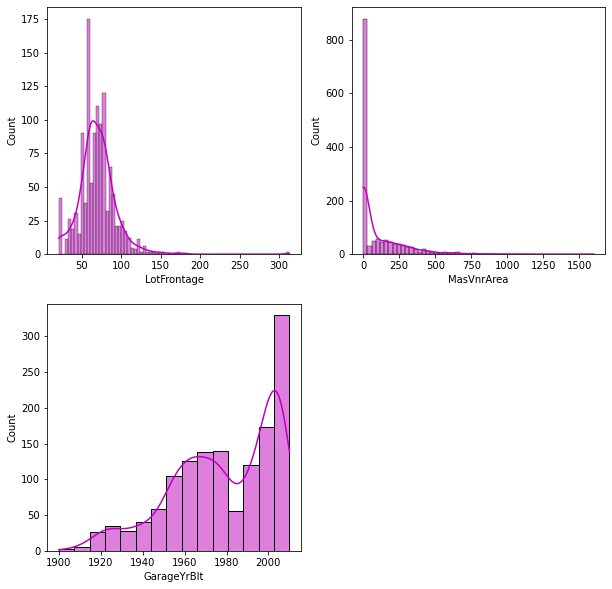

In [84]:
plt.figure(figsize=(10,10))

for i, var in enumerate(null_clm_gre_0):
    plt.subplot(2,2,i+1)
    sns.histplot(df3_num[var], kde=True , color = 'm')


#### Trying with mean value

In [85]:
df4_num_mean = df3_num.fillna(df3_num.mean())
df4_num_mean.isnull().sum().sum()

0

In [72]:
#Now we see that all the values are filled with the mean values and there are no null values present in the dataset.
#Lets check the distribution overlapping now

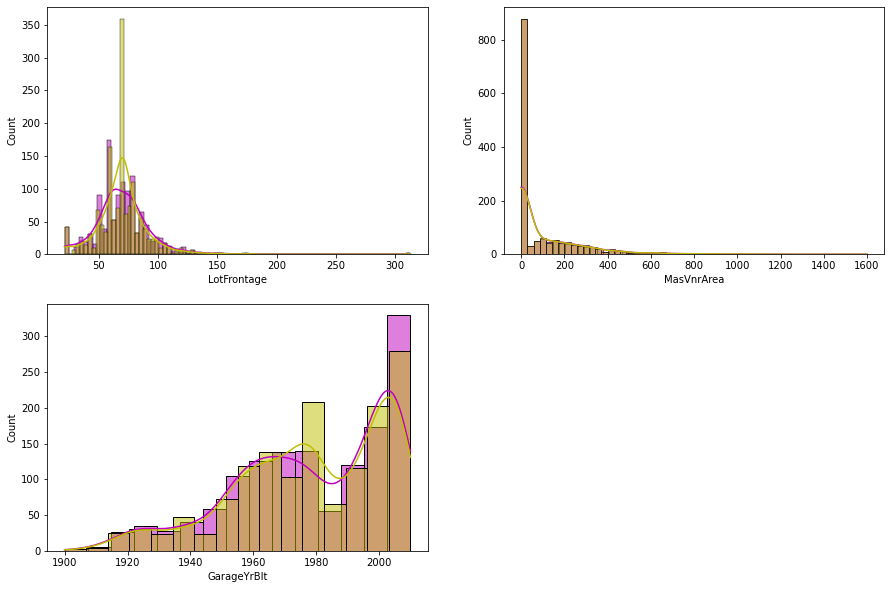

In [86]:
plt.figure(figsize=(15,10))

for i, var in enumerate(null_clm_gre_0):
    plt.subplot(2,2,i+1)
    sns.histplot(df3_num[var], kde=True , color = 'm')
    sns.histplot(df4_num_mean[var], kde=True , color = 'y')


#### Trying with median value

In [87]:
df5_num_median = df3_num.fillna(df3_num.median())
df5_num_median.isnull().sum().sum()

0

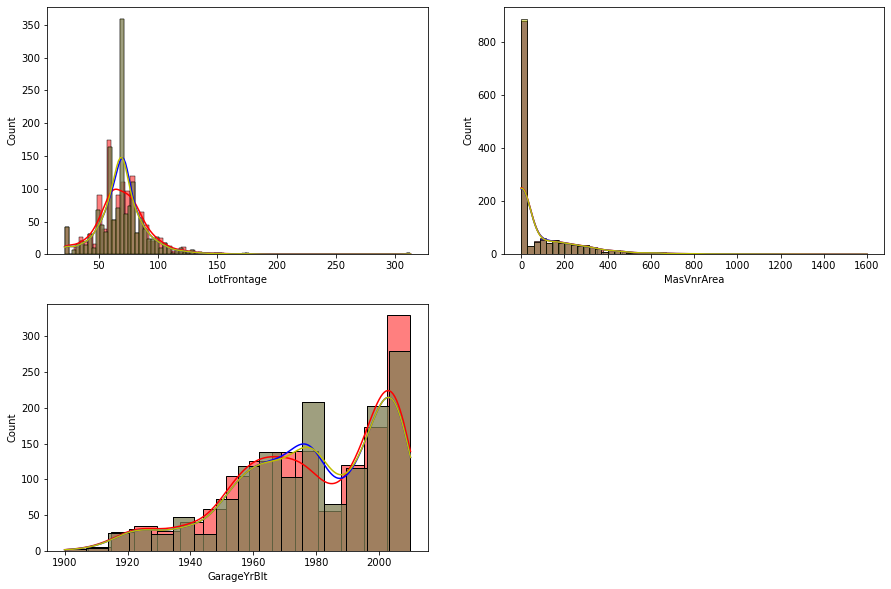

In [96]:
plt.figure(figsize=(15,10))

for i, var in enumerate(null_clm_gre_0):
    plt.subplot(2,2,i+1)
    sns.histplot(df3_num[var], kde=True , color = 'r')
    sns.histplot(df4_num_mean[var], kde=True , color = 'b')
    sns.histplot(df5_num_median[var], kde=True , color = 'y')


In [98]:
# Here is very slight difference in mean and median methods but it can be seen significantly when we have more number of outliers.

In [99]:
#How to check the outliers

C:\Users\KRISHNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISHNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISHNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KRISHNA\anaconda

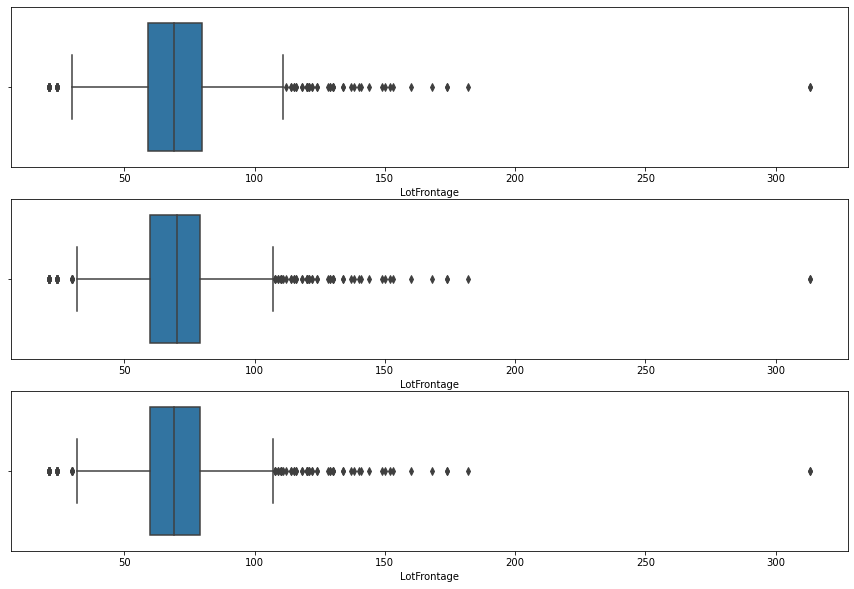

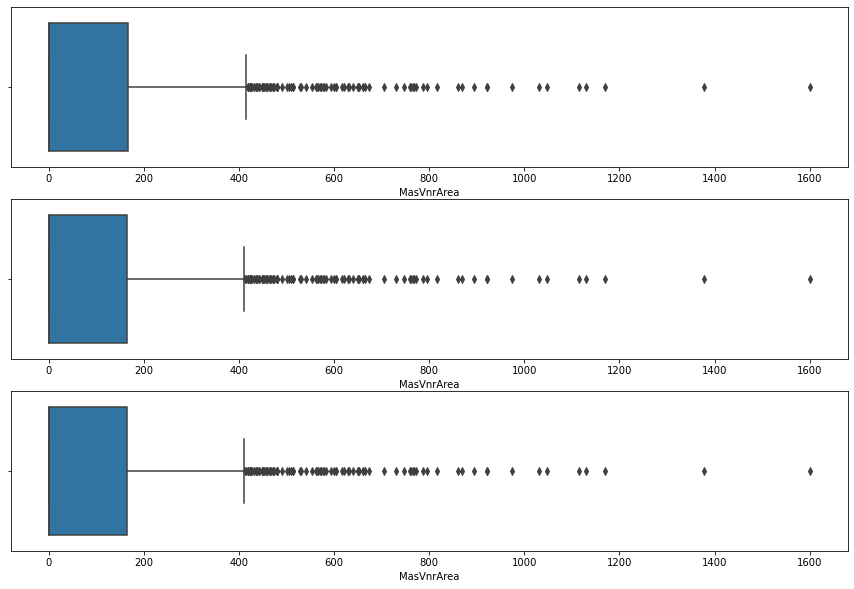

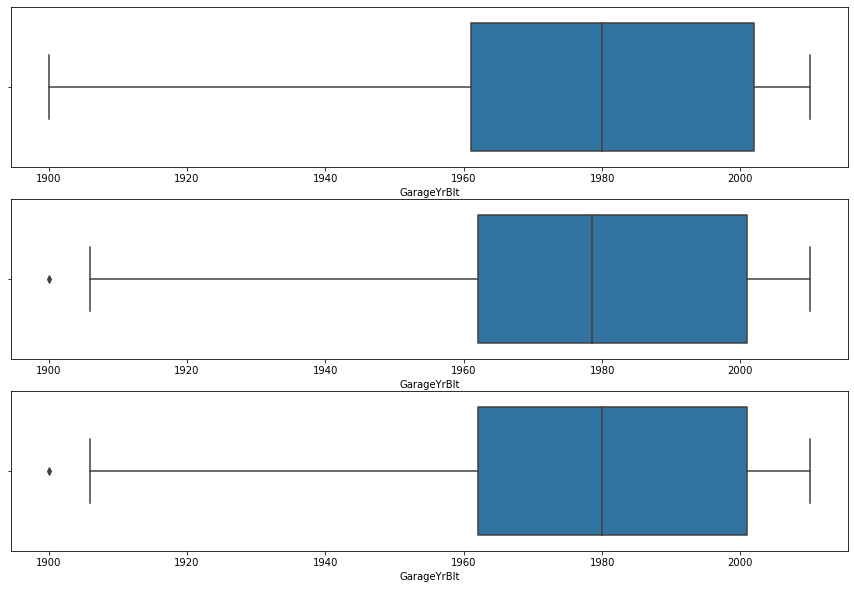

In [111]:
for i, var in enumerate(null_clm_gre_0):
    plt.figure(figsize=(15,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df4_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5_num_median[var])
